<a href="https://colab.research.google.com/github/xh313/TidyTuesdayWithPython/blob/main/TidyTuesday28062022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install basemap
!pip install geopy

import pandas as pd
import matplotlib.pyplot as plt
import regex as re
import seaborn as sns
import numpy as np
from matplotlib.colors import LogNorm
from matplotlib import font_manager as fm
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
from matplotlib.lines import Line2D


!pip install colour
import colour
from matplotlib.colors import ListedColormap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
# Palette
!wget 'https://github.com/BlakeRMills/MetBrewer/raw/main/Python/met_brewer/palettes.py'
import palettes as met

--2022-06-30 02:22:34--  https://github.com/BlakeRMills/MetBrewer/raw/main/Python/met_brewer/palettes.py
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/BlakeRMills/MetBrewer/main/Python/met_brewer/palettes.py [following]
--2022-06-30 02:22:35--  https://raw.githubusercontent.com/BlakeRMills/MetBrewer/main/Python/met_brewer/palettes.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11849 (12K) [text/plain]
Saving to: ‘palettes.py.1’

palettes.py.1       100%[===================>]  11.57K  --.-KB/s    in 0s      

2022-06-30 02:22:35 (101 MB/s) - ‘palettes.py.1’ saved [11849/11849]



In [2]:
# Font control
!wget 'https://github.com/xh313/TidyTuesdayWithPython/raw/main/Avenir.ttc'
font_files = fm.findSystemFonts('.')
# Go through and add each to Matplotlib's font cache.
for font_file in font_files:
    fm.fontManager.addfont(font_file)
    print(font_file)

# Use your new font on all your plots.
plt.rc('font', family='Avenir')

--2022-06-30 02:12:12--  https://github.com/xh313/TidyTuesdayWithPython/raw/main/Avenir.ttc
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/xh313/TidyTuesdayWithPython/main/Avenir.ttc [following]
--2022-06-30 02:12:12--  https://raw.githubusercontent.com/xh313/TidyTuesdayWithPython/main/Avenir.ttc
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1639536 (1.6M) [application/octet-stream]
Saving to: ‘Avenir.ttc’

Avenir.ttc          100%[===================>]   1.56M  --.-KB/s    in 0.05s   

2022-06-30 02:12:13 (29.3 MB/s) - ‘Avenir.ttc’ saved [1639536/1639536]

/content/Avenir.ttc


In [182]:
# Data

df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/\
tidytuesday/master/data/2022/2022-06-28/UK%20Gender%20Pay%2\
0Gap%20Data%20-%202021%20to%202022.csv')
df = df.set_index('EmployerName')#.select_dtypes([int, float])

# Sampling
df = df.iloc[:-1:20]

# Add geodata
geolocator = Nominatim(user_agent="veritashxh")
for row in df.itertuples():
  try:
    df.loc[row[0], 'lon'] = geolocator.geocode(row[3]).longitude
    df.loc[row[0], 'lat'] = geolocator.geocode(row[3]).latitude
    '''
    if 'England' in geolocator.geocode(row[3]).address:
      df.loc[row[0], 'reg'] = 1
    elif 'Scotland' in geolocator.geocode(row[3]).address:
      df.loc[row[0], 'reg'] = 2
    elif 'Wales' in geolocator.geocode(row[3]).address:
      df.loc[row[0], 'reg'] = 3
    elif 'Northern Ireland' in geolocator.geocode(row[3]).address:
      df.loc[row[0], 'reg'] = 4
    #print(row[3])
    '''
  except AttributeError:
    pass
    #print('Not found')

df.to_csv('geodata.csv')

In [201]:
# Retrieve data
df = pd.read_csv('geodata.csv')
df = df.set_index('EmployerName')

df = df[['PostCode', 'DiffMedianHourlyPercent',
         'lon', 'lat']]
df = df.dropna(axis=0)
df = df.sort_values('DiffMedianHourlyPercent',
                    ascending=False)
# remove extremes
df = df.iloc[2:-2] 
df = df.reset_index()

In [202]:
# Viewer
df

,EmployerName,PostCode,DiffMedianHourlyPercent,lon,lat
0,RESOURCE SOLUTIONS LIMITED,WC2E 9AB,56.4,-0.126610,51.512750
1,VALE ACADEMY TRUST,OX12 9AU,56.0,-1.431800,51.591760
2,DHL AIR LIMITED,SL3 0BB,55.3,-0.514740,51.470810
3,ALLEGIS GROUP LIMITED,RG12 1RT,51.4,-0.772909,51.418989
4,Littleover Community School,DE23 4BZ,51.3,-1.531287,52.897821
...,...,...,...,...,...
511,MARS FOOD UK LIMITED,SL1 4LG,-41.7,-0.630876,51.524637
512,SLM FITNESS & HEALTH LIMITED,LE10 3EY,-43.6,-1.381370,52.524000
513,Three Rivers District Council,WD3 1RL,-45.0,-0.468610,51.639530
514,LEGAL & GENERAL HOMES (SERVICES CO) LIMITED,EC2R 5AA,-46.7,-0.090157,51.517220


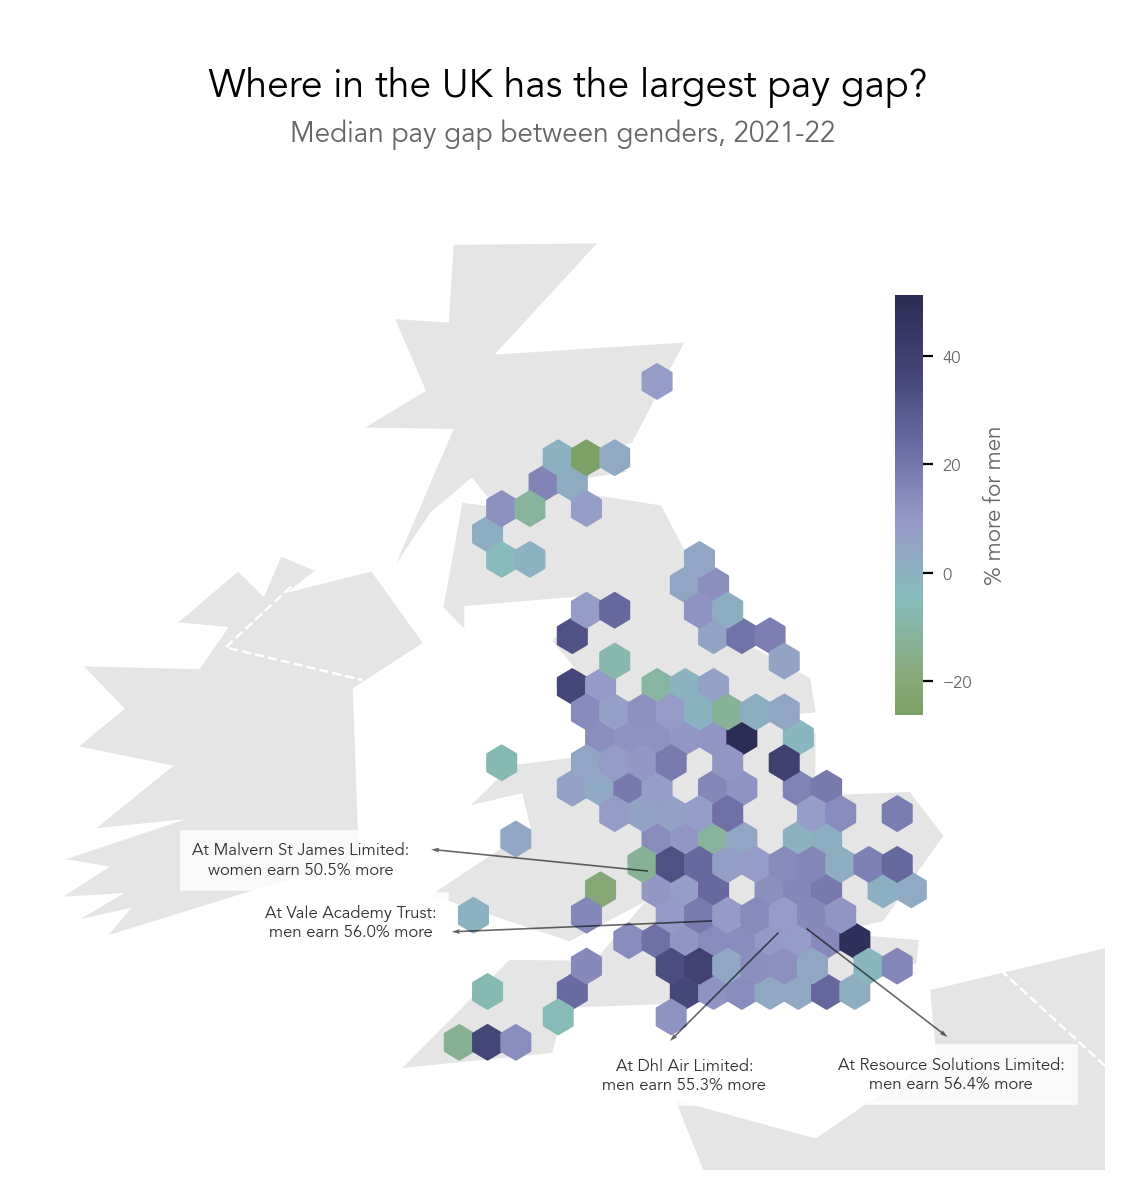

In [237]:
# Figure cell
fig, ax = plt.subplots(figsize=(7,7), dpi=200, 
           facecolor='w',
           #frameon=False
           )
plt.axis('off')


# Draw map
m = Basemap(llcrnrlon=-11, llcrnrlat=49, 
            urcrnrlon=4, urcrnrlat=60,
            #lat_1=30, lon_0=-30,
            projection='cyl',
            area_thresh=10000,
            fix_aspect=False,
            ax=ax)
m.drawmapboundary(fill_color='w',#ffe8ae', 
                  linewidth=0)
m.fillcontinents(color='#000000', 
                 zorder=1,
                 alpha=0.1)

m.drawcountries(linewidth=.9, 
                linestyle='--', 
                color='w',#'#a0a0a0',
                zorder=10)
'''
m.drawcoastlines(linewidth=0.9,
                 linestyle='--',
                 color='#a0a0a0',
                 zorder=10
                 )
                 '''


# Cmap
colors = met.met_brew(name="VanGogh1", 
                      n=200, 
                      brew_type="continuous") #cmap

colors_r = colors[::-1]  # Reverse cmap

cmap = ListedColormap(sns.color_palette(colors_r[15:]).as_hex())


# Plot data
im = m.hexbin(df.lon, df.lat, 
         C=df['DiffMedianHourlyPercent'],
         gridsize=(16,13), 
         cmap=cmap,#plt.cm.bone_r,
         zorder=2,
         alpha=1)


# Annotations
title = plt.title('\n Where in the UK has the largest pay gap?',
                  size=14,)
plt.annotate('Median pay gap between genders, 2021-22', 
             m(-3.5, 59.7), 
             alpha=0.6, size=10,
             ha='center',)

# Highlight the highest
rank = 0
m.quiver([df.loc[rank]['lon']], [df.loc[rank]['lat']],
         [1.3], [-1],
         latlon=True,
         width=0.0015,
         minshaft=3,
         zorder=10,
         alpha=0.6,
         scale=10, 
         color='#000000')
t = plt.annotate(f"""At {df.loc[rank]['EmployerName'].title()}:
men earn {df.loc[rank]['DiffMedianHourlyPercent']}% more""", 
             m(df.loc[rank]['lon'] + 2, df.loc[rank]['lat'] - 1.7), 
             alpha=0.8, size=6,
             ha='center',
             va='bottom',
             zorder=12)
t.set_bbox(dict(facecolor='w', alpha=0.8, edgecolor='w'))


# Highlight the 2nd highest
rank = 1
m.quiver([df.loc[rank]['lon']], [df.loc[rank]['lat']],
         [-2.4], [-0.1],
         latlon=True,
         width=0.0015,
         minshaft=3,
         zorder=10,
         alpha=0.6,
         scale=10, 
         color='#000000')
t = plt.annotate(f"""At {df.loc[rank]['EmployerName'].title()}:
men earn {df.loc[rank]['DiffMedianHourlyPercent']}% more""", 
             m(df.loc[rank]['lon'] - 5, df.loc[rank]['lat'] - 0.2), 
             alpha=0.8, size=6,
             ha='center',
             va='bottom',
             zorder=12)
t.set_bbox(dict(facecolor='w', alpha=0.8, edgecolor='w'))

# Highlight the 3rd highest
rank = 2
m.quiver([df.loc[rank]['lon']], [df.loc[rank]['lat']],
         [-1], [-1],
         latlon=True,
         width=0.0015,
         minshaft=3,
         zorder=10,
         alpha=0.6,
         scale=10, 
         color='#000000')
t = plt.annotate(f"""At {df.loc[rank]['EmployerName'].title()}:
men earn {df.loc[rank]['DiffMedianHourlyPercent']}% more""", 
             m(df.loc[rank]['lon'] - 1.3, df.loc[rank]['lat'] - 1.3), 
             alpha=0.8, size=6,
             ha='center',
             va='top',
             zorder=12)
t.set_bbox(dict(facecolor='w', alpha=0.8, edgecolor='w'))

# Highlight the lowest
rank = len(df) - 1
m.quiver([df.loc[rank]['lon']], [df.loc[rank]['lat']],
         [-2.], [0.2],
         latlon=True,
         width=0.0015,
         minshaft=3,
         zorder=10,
         alpha=0.6,
         scale=10, 
         color='#000000')
t = plt.annotate(f"""At {df.loc[rank]['EmployerName'].title()}:
women earn {-1 * df.loc[rank]['DiffMedianHourlyPercent']}% more""", 
             m(df.loc[rank]['lon'] - 4.8, df.loc[rank]['lat'] + 0.3),
             alpha=0.8, size=6,
             ha='center',
             va='top',
             zorder=12)
t.set_bbox(dict(facecolor='w', alpha=0.8, edgecolor='w'))

# Cbar
cbar_ax = fig.add_axes([0.75, 0.45, 0.02, 0.3])
cbar = fig.colorbar(im, cax=cbar_ax,
             spacing='proportional',
             drawedges=False,
             )
cbar.solids.set_alpha(1)
cbar.outline.set_visible(False)
cbar.set_label('% more for men',
               size=8,
               alpha=0.6)
for label in cbar.ax.get_yticklabels():
  label.set(alpha=0.6,
            size=6,
            fontfamily='Avenir')


plt.show()